In [1]:
# import the required libraries
import pandas as pd 

from pulp import LpProblem, LpMinimize, LpVariable, lpSum 

import matplotlib.pyplot as plt

import os

# move working directory to the folder 'C:\Users\HHolanda\OneDrive - KraftHeinz\MSDS 460'
os.chdir('C:\\Users\\HHolanda\\OneDrive - KraftHeinz\\MSDS 460')

# print the current working directory
print(os.getcwd())

C:\Users\HHolanda\OneDrive - KraftHeinz\MSDS 460


In [127]:
# Create a sample DataFrame with food items, prices, and nutrient values 

data = { 'Food Item': ['Kraft Mac & Cheese', 'Thai Pad Frozen Meal', 'Scrambled Eggs Recipe'
                        ,'Chicken Rice and Broccolis','Yogurt and banana']
        ,'Price ($)': [1.39/3, 4.99, 0.82, 7, 3]
        ,'Sodium (mg)': [560, 760, 200, 200,200]
        ,'Energy (calories)': [250, 410, 365, 330, 210]
        ,'Protein (g)': [9, 40, 24.4, 31,14]
        ,'Vitamin D (mcg)': [0, 0, 3.04, 0,0]
        ,'Calcium (mg)': [110, 90, 156, 61,487]
        ,'Iron (mg)': [2.5, 3.9 , 2.7, 5.7,0.22]
        ,'Potassium (mg)': [330, 360, 304,488,625]
        }

df = pd.DataFrame(data) 

# Define the linear programming problem 

model = LpProblem(name="Food_Optimization", sense=LpMinimize) 

# Create decision variables for each food item 

food_vars = [LpVariable(name=f"{row['Food Item']}", lowBound=0, cat='Continuous')\
              for index, row in df.iterrows()
              ] 

# Add objective function to minimize the cost
model += lpSum(df.loc[i, 'Price ($)'] * food_vars[i] for i in range(len(df)))

# Add constraints and give names to the constraints
model += lpSum(df.loc[i, 'Sodium (mg)'] * food_vars[i] for i in range(len(df))) <= 5000, 'Sodium (mg)'
model += lpSum(df.loc[i, 'Energy (calories)'] * food_vars[i] for i in range(len(df))) >= 2000, 'Energy (calories) min'
model += lpSum(df.loc[i, 'Energy (calories)'] * food_vars[i] for i in range(len(df))) <= 2200, 'Energy (calories) max'
model += lpSum(df.loc[i, 'Protein (g)'] * food_vars[i] for i in range(len(df))) >= 50, 'Protein (g)'
model += lpSum(df.loc[i, 'Vitamin D (mcg)'] * food_vars[i] for i in range(len(df))) >= 20, 'Vitamin D (mcg)'
model += lpSum(df.loc[i, 'Calcium (mg)'] * food_vars[i] for i in range(len(df))) >= 1300, 'Calcium (mg)'
model += lpSum(df.loc[i, 'Iron (mg)'] * food_vars[i] for i in range(len(df))) >= 18, 'Iron (mg)'
model += lpSum(df.loc[i, 'Potassium (mg)'] * food_vars[i] for i in range(len(df))) >= 4700, 'Potassium (mg)'


# Solve the optimization problem using simplex method
model.solve()

# Display the optimal food items and their quantities 
for var in model.variables():
    if var.varValue >= 0 :
        print(f"{var.name} = {var.varValue}")

Chicken_Rice_and_Broccolis = 0.0
Scrambled_Eggs_Recipe = 6.5789474
Thai_Pad_Frozen_Meal = 0.0
Yogurt_and_banana = 8.527133


In [129]:
# display the model
print(model)

Food_Optimization:
MINIMIZE
7.0*Chicken_Rice_and_Broccolis + 0.4633333333333333*Kraft_Mac_&_Cheese + 0.82*Scrambled_Eggs_Recipe + 4.99*Thai_Pad_Frozen_Meal + 3.0*Yogurt_and_banana + 0.0
SUBJECT TO
Sodium_(mg): 200 Chicken_Rice_and_Broccolis + 560 Kraft_Mac_&_Cheese
 + 200 Scrambled_Eggs_Recipe + 760 Thai_Pad_Frozen_Meal
 + 200 Yogurt_and_banana <= 5000

Energy_(calories)_min: 330 Chicken_Rice_and_Broccolis + 250 Kraft_Mac_&_Cheese
 + 365 Scrambled_Eggs_Recipe + 410 Thai_Pad_Frozen_Meal
 + 210 Yogurt_and_banana >= 2000

Energy_(calories)_max: 330 Chicken_Rice_and_Broccolis + 250 Kraft_Mac_&_Cheese
 + 365 Scrambled_Eggs_Recipe + 410 Thai_Pad_Frozen_Meal
 + 210 Yogurt_and_banana <= 2200

Protein_(g): 31 Chicken_Rice_and_Broccolis + 9 Kraft_Mac_&_Cheese
 + 24.4 Scrambled_Eggs_Recipe + 40 Thai_Pad_Frozen_Meal + 14 Yogurt_and_banana
 >= 50

Vitamin_D_(mcg): 3.04 Scrambled_Eggs_Recipe >= 20

Calcium_(mg): 61 Chicken_Rice_and_Broccolis + 110 Kraft_Mac_&_Cheese
 + 156 Scrambled_Eggs_Recipe + 90

Total Cost = 27.28427047733333


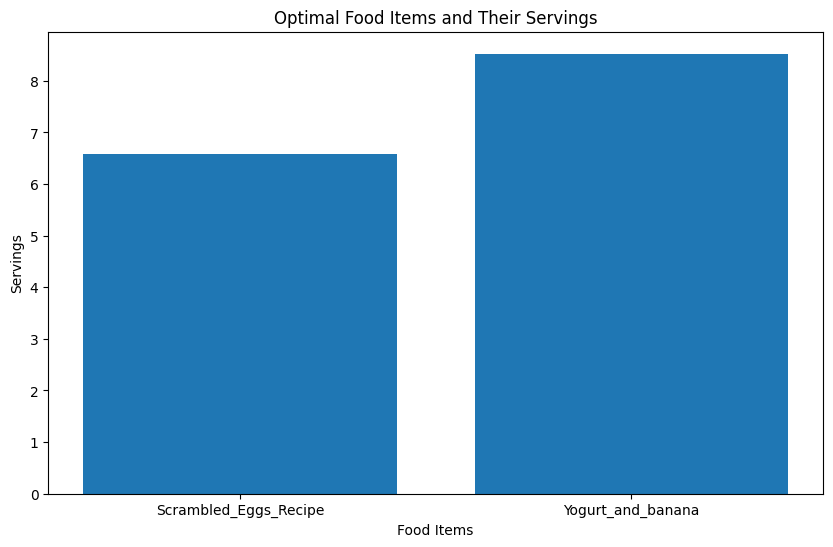

In [131]:
# Display the optimal cost
print(f"Total Cost = {model.objective.value()}")

# Plot the optimal food items and their servings
plt.figure(figsize=(10, 6))
plt.bar([var.name for var in model.variables() if var.varValue > 0], [var.varValue for var in model.variables() if var.varValue > 0])
plt.xlabel('Food Items')
plt.ylabel('Servings')
plt.title('Optimal Food Items and Their Servings')
plt.show()

In [132]:
# create dictionary to store the optimal food items and their servings
optimal_food_items = {}
for var in model.variables():
    if var.varValue >= 0 :
        optimal_food_items[var.name] = var.varValue

# create a DataFrame to store the optimal food items and their servings
optimal_food_items_df = pd.DataFrame(optimal_food_items.items(), columns=['Food Item', 'Servings'])

# replace spaces in the 'Food Item' column with underscores
df['Food Item'] = df['Food Item'].str.replace(' ', '_')

# merge the df and optimal_food_items_df dataframes
merged_df = pd.merge(df, optimal_food_items_df, on='Food Item')

# display the merged_df dataframe
print(merged_df)



                    Food Item  Price ($)  Sodium (mg)  Energy (calories)  \
0        Thai_Pad_Frozen_Meal       4.99          760                410   
1       Scrambled_Eggs_Recipe       0.82          200                365   
2  Chicken_Rice_and_Broccolis       7.00          200                330   
3           Yogurt_and_banana       3.00          200                210   

   Protein (g)  Vitamin D (mcg)  Calcium (mg)  Iron (mg)  Potassium (mg)  \
0         40.0             0.00            90       3.90             360   
1         24.4             3.04           156       2.70             304   
2         31.0             0.00            61       5.70             488   
3         14.0             0.00           487       0.22             625   

   Servings  
0  0.000000  
1  6.578947  
2  0.000000  
3  8.527133  


In [133]:
# calculate the nutrient values for the optimal food items
sodium = sum(merged_df['Sodium (mg)'] * merged_df['Servings'])
energy = sum(merged_df['Energy (calories)'] * merged_df['Servings'])
protein = sum(merged_df['Protein (g)'] * merged_df['Servings'])
vitamin_d = sum(merged_df['Vitamin D (mcg)'] * merged_df['Servings'])
calcium = sum(merged_df['Calcium (mg)'] * merged_df['Servings'])
iron = sum(merged_df['Iron (mg)'] * merged_df['Servings'])
potassium = sum(merged_df['Potassium (mg)'] * merged_df['Servings'])

# display the nutrient values for the optimal food items
print(f"Sodium (mg): {sodium}")
print(f"Energy (calories): {energy}")
print(f"Protein (g): {protein}")
print(f"Vitamin D (mcg): {vitamin_d}")
print(f"Calcium (mg): {calcium}")
print(f"Iron (mg): {iron}")
print(f"Potassium (mg): {potassium}")

# create a dictionary to store the nutrient values for the optimal food items
nutrient_values = {'Sodium (mg)': sodium
                   ,'Energy (calories)': energy
                   ,'Protein (g)': protein
                   ,'Vitamin D (mcg)': vitamin_d
                   ,'Calcium (mg)': calcium
                   ,'Iron (mg)': iron
                   ,'Potassium (mg)': potassium
                   }


Sodium (mg): 3021.2160799999997
Energy (calories): 4192.013730999999
Protein (g): 279.90617855999994
Vitamin D (mcg): 20.000000096
Calcium (mg): 5179.0295654
Iron (mg): 19.63912724
Potassium (mg): 7329.4581345999995


In [64]:
# Save the solution in a DataFrame
solution_data = {'Food Item': [var.name for var in food_vars], 'Servings': [var.varValue for var in food_vars]}
solution_df = pd.DataFrame(solution_data)

# save the optimal nutrient values in another DataFrame
optimal_nutrients_df = pd.DataFrame(optimal_nutrients, index=[0])

# Save the solution and optimal nutrient values to Excel
with pd.ExcelWriter('food_optimization_solution.xlsx') as writer:
    solution_df.to_excel(writer, sheet_name='Solution', index=False)
    optimal_nutrients_df.to_excel(writer, sheet_name='Optimal Nutrient Values', index=False)

PermissionError: [Errno 13] Permission denied: 'food_optimization_solution.xlsx'